<a href="https://colab.research.google.com/github/Wairimukimm/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#dataset - https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment/data


In [36]:
#import the necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import nltk

In [37]:
#read in the data
data = pd.read_csv('Tweets.csv')

In [38]:
#display some information
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [39]:
#select columns to drop
columns=['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone']

In [40]:
#drop the columns
df=data.drop(columns,axis=1)

In [41]:
#display the data
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [42]:
#check for the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [43]:
#check for shape
df.shape

(14640, 2)

In [44]:
#check for missing values
df.isnull().sum()

airline_sentiment    0
text                 0
dtype: int64

In [45]:
#check for duplicated values
df.duplicated().sum()

188

In [47]:
#drop the duplicates
df.drop_duplicates()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [48]:
#dealing with categorical values
df['airline_sentiment']=df['airline_sentiment'].replace(['negative', 'neutral','positive'], [1, 0,2])

In [49]:
df.head()

,airline_sentiment,text
0,0,@VirginAmerica What @dhepburn said.
1,2,@VirginAmerica plus you've added commercials t...
2,0,@VirginAmerica I didn't today... Must mean I n...
3,1,@VirginAmerica it's really aggressive to blast...
4,1,@VirginAmerica and it's a really big bad thing...


In [50]:
#cleaning data
from nltk.stem import PorterStemmer
nltk.download('punkt')

#instantiate
stemmer = PorterStemmer()
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
stopwords = nltk.corpus.stopwords.words('english')

In [52]:
stopwords.append('virginamerica')

In [53]:
def clean_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [t for t in text if len(t) > 1]
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    text = ' '.join(text)
    return text

In [54]:
df['text'][14]

'@VirginAmerica Thanks!'

In [55]:
clean_text(df['text'][14])

'thank'

In [56]:
df['text'] = df['text'].apply(clean_text)

In [57]:
#factorization
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
cv  = CountVectorizer(max_features=20000)

In [64]:
X = cv.fit_transform(df['text']).toarray()

In [67]:
y = df['airline_sentiment'].to_numpy()

In [68]:
#downsampling
print(np.unique(y))
print(np.bincount(y))

[0 1 2]
[3099 9178 2363]


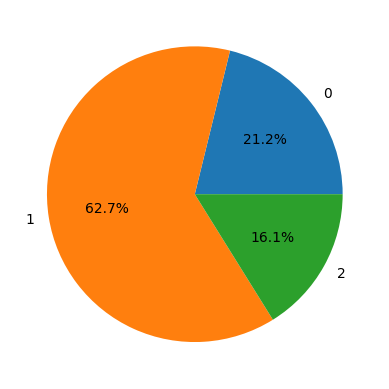

In [70]:
plt.pie(np.bincount(y), labels=np.unique(y), autopct="%1.1f%%")
plt.show()

In [71]:
# As we can see the number of negative tweets are greater than both possitive and neutral tweets so we need to make the data equal for each class

In [72]:
from imblearn.under_sampling import RandomUnderSampler
smote=RandomUnderSampler(sampling_strategy='auto',random_state=42)

In [73]:
X.shape

(14640, 12522)

In [74]:
y.shape

(14640,)

In [75]:
X, y = smote.fit_resample(X,y)

In [76]:
X.shape

(7089, 12522)

In [77]:
y.shape

(7089,)

In [78]:
print(np.unique(y))
print(np.bincount(y))

[0 1 2]
[2363 2363 2363]


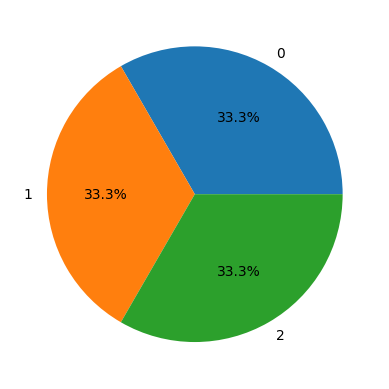

In [79]:
plt.pie(np.bincount(y), labels=np.unique(y), autopct="%1.1f%%")
plt.show()

In [80]:
#model training
from sklearn.naive_bayes import MultinomialNB

In [81]:
model = MultinomialNB()

In [82]:
model.fit(X, y)

MultinomialNB()

In [83]:
print("Training Data Accuracy: ")
print( model.score(X, y) )

Training Data Accuracy: 
0.8428551276625759
